## EDA

Antes de iniciar a responder preguntas, visualicemos y entendamos la data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
from scipy import stats
%matplotlib inline

In [2]:
# Read de data
path = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')
df = pd.read_csv(os.path.join(path, 'survey.csv'))

In [3]:
df.sample(5)

,ResponseId,Age,Gender,Trans,Sexuality,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,MainBranch,Employment,DevType,ConvertedCompYearly,YearsLearnPro,Degree
4780,61251,35-44 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Non-traditional,21.0,18.0,I am a developer by profession,Employed,"Developer, front-end;Developer, full-stack;Dev...",109956.0,3.0,Yes
2197,29146,25-34 years old,Man,No,Straight / Heterosexual,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Non-traditional,5.0,3.0,I am a developer by profession,Employed,"Developer, front-end",39456.0,2.0,Yes
2475,31236,18-24 years old,Man,No,Straight / Heterosexual,Uruguay,Some college/university study without earning ...,11 - 17 years,Both,7.0,3.0,I am a developer by profession,Employed,"Developer, full-stack;Developer, back-end",36000.0,4.0,No
5991,78658,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18 - 24 years,Non-traditional,12.0,10.0,I am a developer by profession,Employed,"Developer, desktop or enterprise applications",10992.0,2.0,Yes
5923,77497,35-44 years old,Man,No,Straight / Heterosexual,Uruguay,Some college/university study without earning ...,< 10 years,Both,25.0,20.0,I am a developer by profession,Employed,"Developer, front-end;Developer, desktop or ent...",129720.0,5.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6295 entries, 0 to 6294
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           6295 non-null   int64  
 1   Age                  6269 non-null   object 
 2   Gender               6295 non-null   object 
 3   Trans                6207 non-null   object 
 4   Sexuality            6295 non-null   object 
 5   Country              6295 non-null   object 
 6   EdLevel              6284 non-null   object 
 7   Age1stCode           6290 non-null   object 
 8   LearnCode            6276 non-null   object 
 9   YearsCode            6220 non-null   float64
 10  YearsCodePro         5155 non-null   float64
 11  MainBranch           6295 non-null   object 
 12  Employment           6293 non-null   object 
 13  DevType              5549 non-null   object 
 14  ConvertedCompYearly  4388 non-null   float64
 15  YearsLearnPro        5147 non-null   f

In [5]:
df.describe()

,ResponseId,YearsCode,YearsCodePro,ConvertedCompYearly,YearsLearnPro
count,6295.000000,6220.000000,5155.000000,4.388000e+03,5147.000000
mean,41790.958062,12.118408,8.821629,4.906186e+04,4.724500
std,22830.185050,8.698174,7.477424,1.371665e+05,3.614725
min,12.000000,0.500000,0.500000,1.200000e+01,0.000000
25%,25129.500000,6.000000,3.000000,1.567200e+04,2.000000
50%,40617.000000,10.000000,6.000000,2.810500e+04,4.000000
75%,60777.000000,16.000000,12.000000,4.718400e+04,6.000000
max,83439.000000,50.000000,50.000000,4.656132e+06,31.000000


Los salarios tienen una desviación estándar muy grande, podríamos usar otros estadísticos como la trim mean

In [6]:
stats.trim_mean(df.ConvertedCompYearly.dropna(), 0.2)

29632.66514806378

In [7]:
# Set styles
sns.set_theme()
pio.templates.default = 'ggplot2'

Función para gráficas de barras horizontales normalizadas (este tipo de gráfica se pude aplicar a varias de las preguntas de la encuesta al ser variables categóricas):

In [8]:
def barploth_normalized(data, title='Title', figsize=(9, 5), padding=-30, label=True):

    if data.shape[0] < 30:
        df_plot = data
    else:
        df_plot = data.value_counts(normalize=True)

    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=round(df_plot*100, 1), y=df_plot.index)
    if label:
        ax.bar_label(ax.containers[0], padding=padding, size=11)
    plt.title(title, size=15)
    plt.xlabel('Porcentaje (%)', size=13)
    plt.margins(0.02)
    plt.show()

### Demográficos

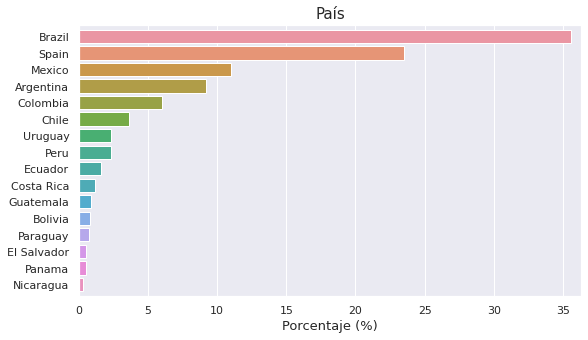

In [9]:
barploth_normalized(data=df.Country, title='País', label=False)

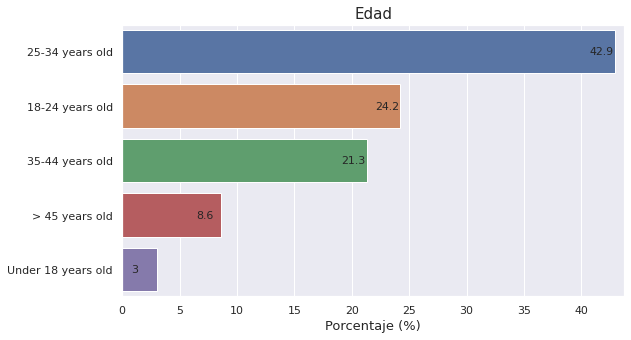

In [10]:
barploth_normalized(df.Age, title='Edad', padding=-25)

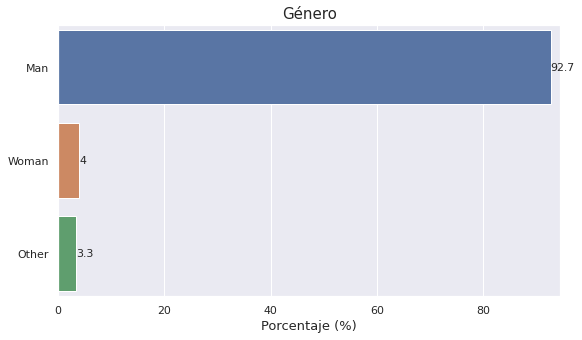

In [11]:
barploth_normalized(df.Gender, title='Género', padding=0)

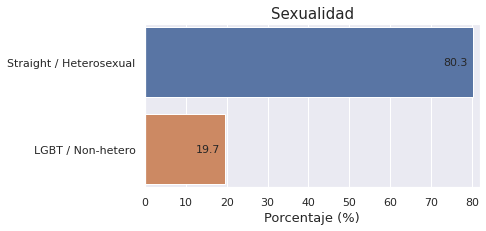

In [12]:
barploth_normalized(df.Sexuality, title='Sexualidad', figsize=(6, 3))

* Las personas encuestadas que se identificaron como hombres son el 92%. Esto muestra una fuerte desigualdad de género.

* De la misma forma, personas que se identifican como no heterosexuales son minoría (19.7%).

### Educación

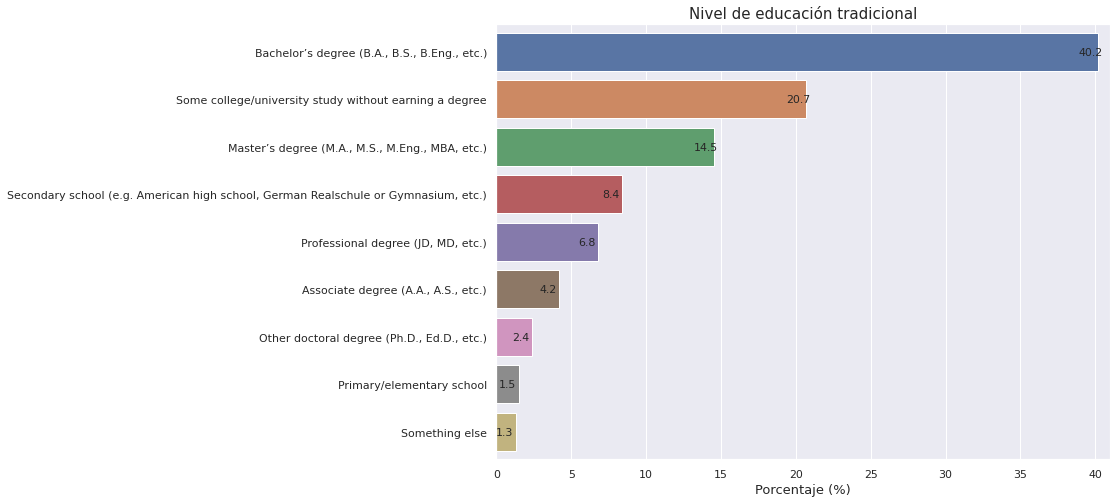

In [13]:
barploth_normalized(df.EdLevel, title='Nivel de educación tradicional', padding=-20, figsize=(11,8))

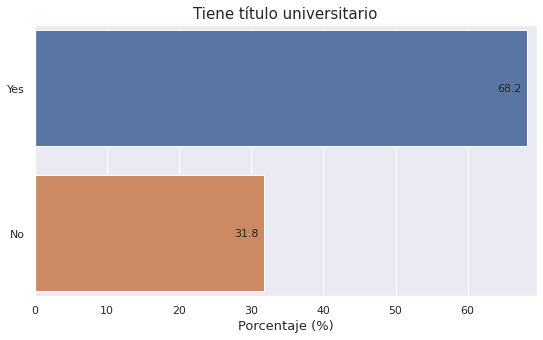

In [14]:
barploth_normalized(df.Degree, title='Tiene título universitario', padding=-30)

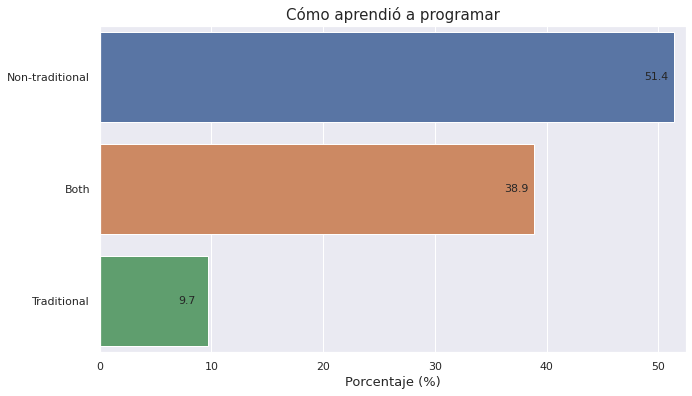

In [15]:
barploth_normalized(df.LearnCode, title='Cómo aprendió a programar', figsize=(10.5, 6))

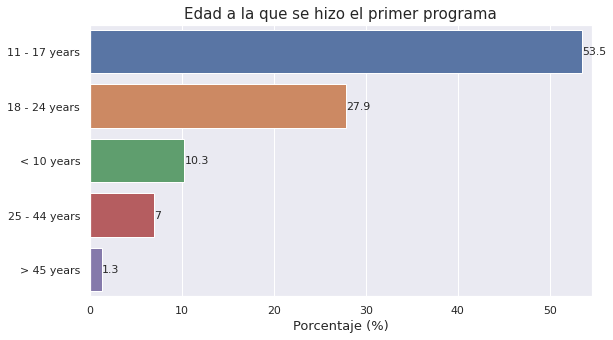

In [16]:
barploth_normalized(df.Age1stCode, title='Edad a la que se hizo el primer programa', padding=0)

In [17]:
px.histogram(df, x='YearsLearnPro', marginal='box', title='Años desde que empezó a aprender código hasta ser profesional', nbins=50)

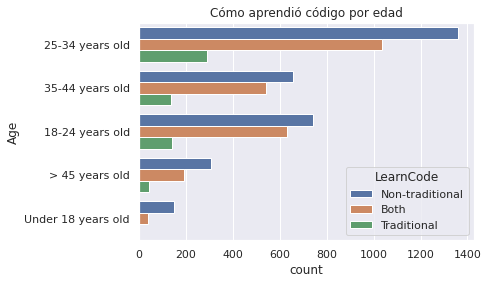

In [34]:
sns.countplot(y=df.Age, hue=df.LearnCode, hue_order=['Non-traditional', 'Both', 'Traditional'])
plt.title('Cómo aprendió código por edad')
plt.show()

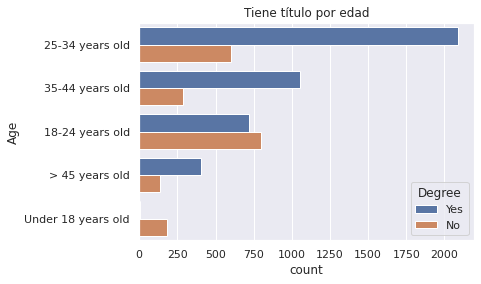

In [41]:
sns.countplot(y=df.Age, hue=df.Degree)
plt.title('Tiene título por edad')
plt.show()

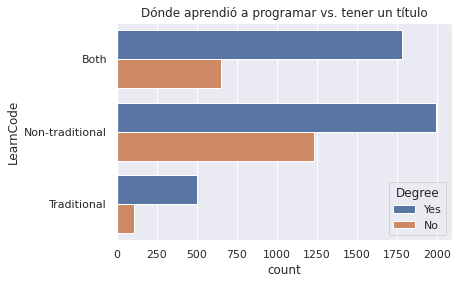

In [39]:
sns.countplot(y=df.LearnCode, hue=df.Degree)
plt.title('Dónde aprendió a programar vs. tener un título')
plt.show()

* La mayoría tiene estudios superiores. Pero pocas personas dicen haber aprendido en la universidad. Esto sugiere que la mayoría aprendió de forma autodidacta o no tradicional.

* Casi el 90% hizo su primer programa antes de los 24 años.

* La mayoría de los encuestados tardó entre 2 y 6 años en conseguir su primer empleo desde que empezó a aprender a programar.

* Para todos los rangos de edad la forma de aprender a programar se comporta igual, la mayoría aprendieron a programar de maneras no tradicionales.

### Empleo

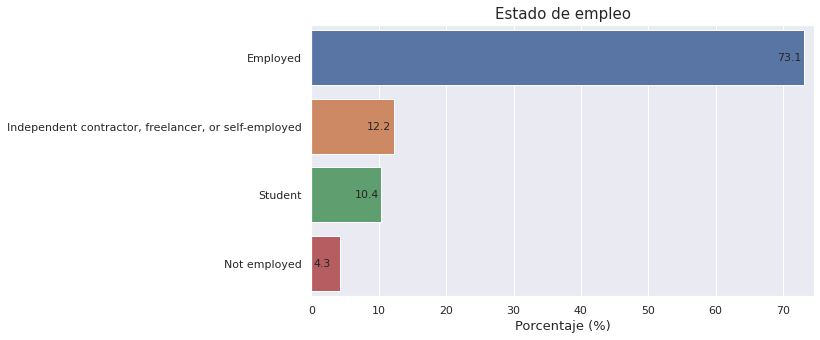

In [18]:
barploth_normalized(df.Employment, title='Estado de empleo', padding=-27)

Se crea una nueva función y un DataFrame para poder graficar las variables con respuestas múltiples.

In [19]:
# Function for multi-answers columns
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [20]:
# Mainbranch is a multi-answer column
total_m = split_multicolumn(df.MainBranch).sum().sum()
df_mainbranch = (split_multicolumn(df.MainBranch).sum()/total_m).sort_values(ascending=False)

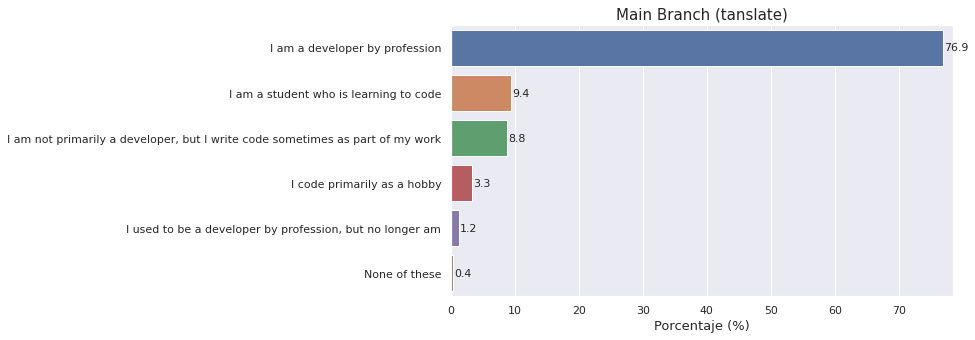

In [21]:
# Quiza elimne esta columna
barploth_normalized(df_mainbranch, title='Main Branch (tanslate)', padding=1)

In [22]:
# DevType is a multi-answer column
total_d = split_multicolumn(df.DevType).sum().sum()
df_DevType = (split_multicolumn(df.DevType).sum()/total_d).sort_values(ascending=False)

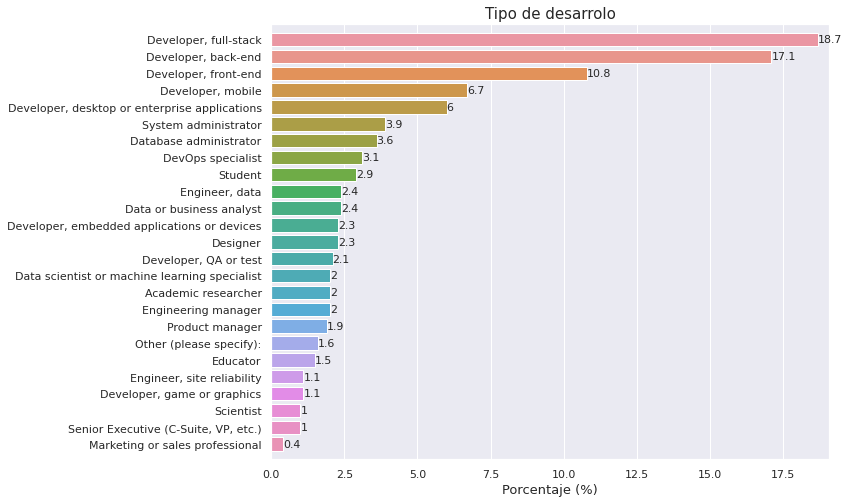

In [23]:
barploth_normalized(df_DevType, title='Tipo de desarrolo', figsize=(10, 8), padding=0)

In [24]:
px.histogram(df, x='ConvertedCompYearly', marginal='box', title='Salarios')

- El 85% de los encuestados tienen empleo.
- Sus ganancias rondan entre 15.6k y 47.2k dólares anuales. Y hay varios outliers con ganancias mucho mayores.

# Bi and multivariate EDA

### Género y compensación

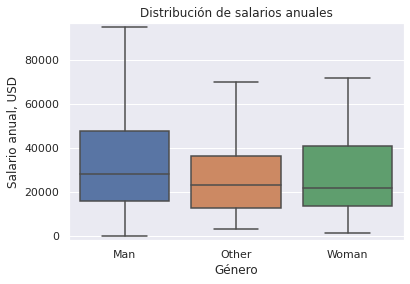

In [27]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Gender", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales')
plt.xlabel('Género')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

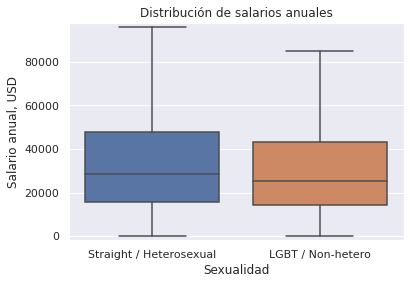

In [28]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Sexuality", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales')
plt.xlabel('Sexualidad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

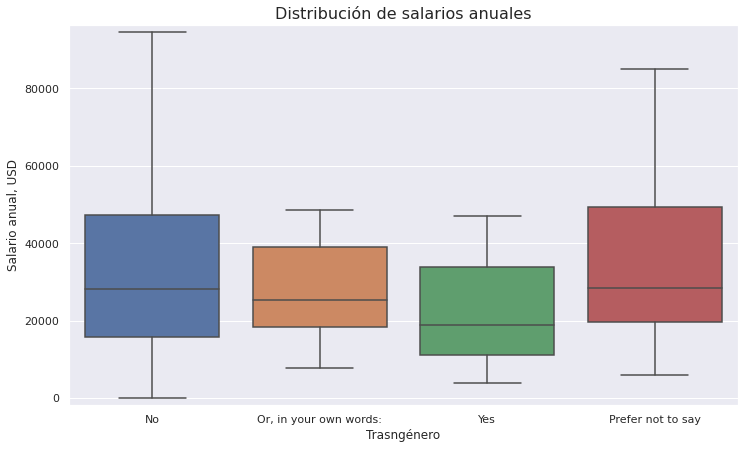

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x="Trans", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales', size=16)
plt.xlabel('Trasngénero')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

A simple vista podemos ver que:
- Los hombres ganan más que las mujeres.
- Quienes afirman ser heterosexuales ganan más que los que no.
- Quienes afirman no ser transgénero ganan más que quienes sí lo hacen.

En el siguiente notebook se harán test de hipótesis para comprobarlo

### Edades y salarios

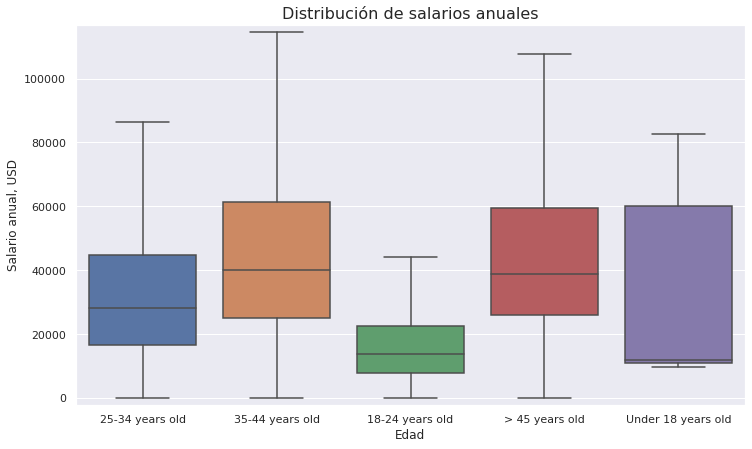

In [30]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x="Age", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales', size=16)
plt.xlabel('Edad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

- A partir de los 35 años se tiende a ganar más.
- Los datos de personas de menos de 18 años se deben descartar porque la muestra es muy pequeña.

### Educación y salario

In [33]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].mean().round(2)

Age                 LearnCode      
18-24 years old     Both               18333.27
                    Non-traditional    19006.74
                    Traditional        27990.52
25-34 years old     Both               44146.97
                    Non-traditional    51018.76
                    Traditional        71443.70
35-44 years old     Both               56220.59
                    Non-traditional    74909.93
                    Traditional        65226.29
> 45 years old      Both               53990.01
                    Non-traditional    59525.56
                    Traditional        50094.25
Under 18 years old  Both               11760.00
                    Non-traditional    40851.00
                    Traditional             NaN
Name: ConvertedCompYearly, dtype: float64

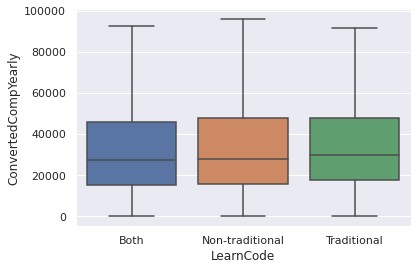

In [35]:
sns.boxplot(x=df.LearnCode, y=df.ConvertedCompYearly, showfliers=False)
plt.show()

In [36]:
median_salary = df.groupby('EdLevel')[['ConvertedCompYearly']].agg(np.median) \
.sort_values(by='ConvertedCompYearly', ascending=False)

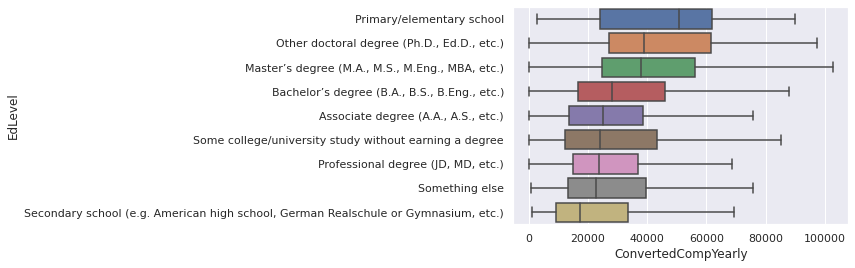

In [37]:
sns.boxplot(y=df.EdLevel, 
            x=df.ConvertedCompYearly, 
            order=list(median_salary.index), 
            showfliers=False)
plt.show()

Qué está pasando aquí jaja primary school tiene el top salarios y secondart school el mínimo (aquí solo hubo una respuesta, la pregunta es el máximo nivel de estudios). Para tomar en cuenta, ver el número de registros:

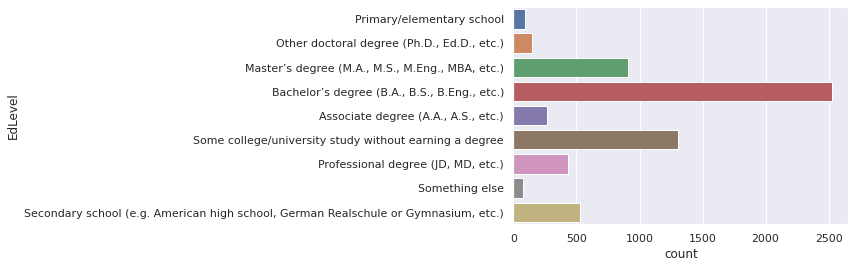

In [38]:
sns.countplot(y=df.EdLevel, order=list(median_salary.index))
plt.show()

#### Tienen empleo o no según tipo de educación

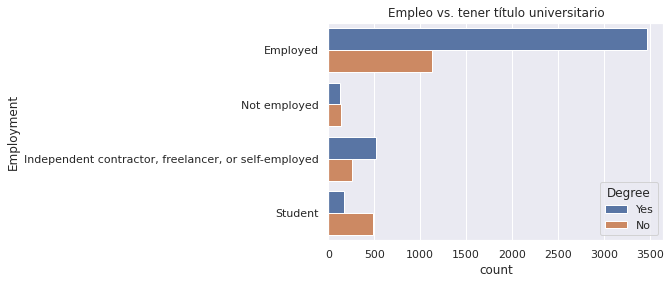

In [42]:
sns.countplot(y=df.Employment, hue=df.Degree)
plt.title('Empleo vs. tener título universitario')
plt.show()

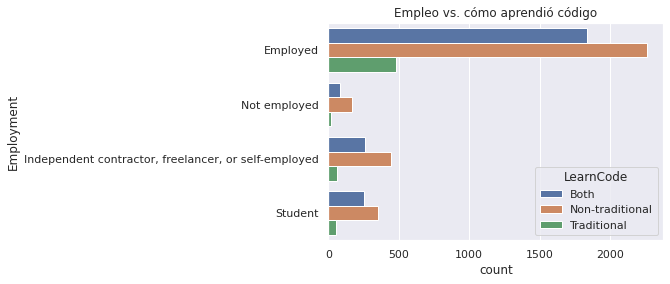

In [43]:
sns.countplot(y=df.Employment, hue=df.LearnCode)
plt.title('Empleo vs. cómo aprendió código')
plt.show()

- Para los grupos con empleo, domina el tener título y aprender código de manera no tradicional.
- Para los grupos sin empleo y estudiantes, es más común no tener título. También su principal forma de aprender es de manera no tradicional.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09491c61-3767-4289-98fd-88aee19bb45d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>